In [3]:
%matplotlib inline


# The Solar Cycle


This example shows the current and possible next solar cycle.



In [1]:
from __future__ import print_function, division

import datetime
import matplotlib.pyplot as plt

import sunpy.timeseries as ts
from sunpy.data.sample import NOAAINDICES_TIMESERIES, NOAAPREDICT_TIMESERIES

For this example we will use the SunPy sample data, if you want the current
data, delete the argument to the ``create`` function. i.e.
``noaa = lc.NOAAIndicesLightCurve.create()``



In [2]:
noaa = ts.TimeSeries(NOAAINDICES_TIMESERIES, source='noaaindices')
noaa_predict = ts.TimeSeries(NOAAPREDICT_TIMESERIES, source='noaapredictindices')

Next lets grab the data again to create a new data structure that we will
shift by 12 years to simulate the next solar cycle. We will truncate the
data to only plot what is necessary.



In [7]:
noaa_predict.data.tail()

,sunspot,sunspot low,sunspot high,radio flux,radio flux low,radio flux high
time,,,,,,
2019-08-01,5.5,15.5,0.0,63.8,72.8,60.0
2019-09-01,5.1,15.1,0.0,63.4,72.4,60.0
2019-10-01,4.8,14.8,0.0,63.1,72.1,60.0
2019-11-01,4.4,14.4,0.0,62.8,71.8,60.0
2019-12-01,4.1,14.1,0.0,62.5,71.5,60.0


In [4]:
noaa2 = ts.TimeSeries(NOAAINDICES_TIMESERIES, source='noaaindices')
noaa2.data = noaa2.data.shift(2, freq=datetime.timedelta(days=365*12))
noaa2 = noaa2.truncate('2021/04/01', '2030/01/01')

Finally lets plot everything together with some arbitrary range for the
strength of the next solar cycle.



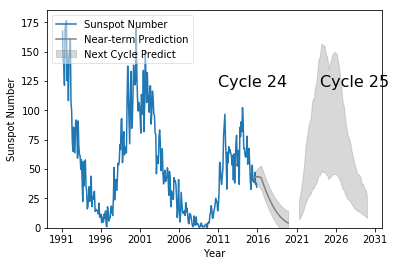

In [5]:
plt.plot(noaa.data.index, noaa.data['sunspot RI'], label='Sunspot Number')
plt.plot(noaa_predict.data.index, noaa_predict.data['sunspot'],
         color='grey', label='Near-term Prediction')
plt.fill_between(noaa_predict.data.index, noaa_predict.data['sunspot low'],
                 noaa_predict.data['sunspot high'], alpha=0.3, color='grey')

plt.fill_between(noaa2.data.index, noaa2.data['sunspot RI smooth']*0.4,
                 noaa2.data['sunspot RI smooth']*1.3, alpha=0.3, color='grey',
                 label='Next Cycle Predict')
plt.ylim(0)
plt.text('2011-01-01', 120, 'Cycle 24', fontsize=16)
plt.text('2024-01-01', 120, 'Cycle 25', fontsize=16)
plt.ylabel('Sunspot Number')
plt.xlabel('Year')
plt.legend(loc=2, framealpha=0.5)
plt.show()